## Liquid Culture Growth

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

First, let's look at the growth rates from 5 cultures derived from freezer stocks **(Liquid-Liquid Inoculation)**:

In [25]:
LL_absorbance = pd.read_csv('../data/LL_absorbance.csv').drop(columns='Unnamed: 0')
LL_absorbance.head()

,sample,0,17,41,65,185
0,B1,0.0,0.002,0.379,0.431,0.452
1,B2,0.0,0.003,0.365,0.415,0.399
2,B3,0.0,0.001,0.266,0.406,0.407
3,B4,0.0,0.000,0.206,0.403,0.363
4,B5,0.0,0.001,0.317,0.391,0.371


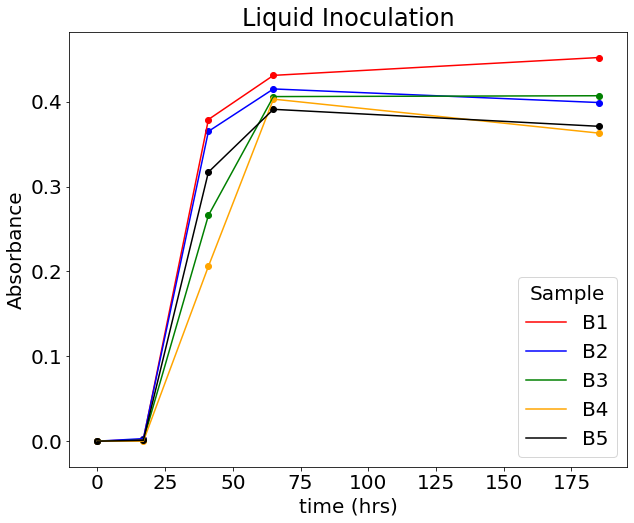

In [318]:
plt.figure(figsize=(10, 8))
plt.rc('font', size=20)  
plt.title('Liquid Inoculation')
plt.xlabel('time (hrs)')
plt.ylabel('Absorbance')
colors = ['red','blue','green','orange','black']
hours = LL_absorbance.columns.values[1:].astype(int)
for idx,row in LL_absorbance.iterrows():
    plt.scatter(hours,row[1:],color = colors[idx])
    plt.plot(hours,row[1:],color = colors[idx],label=row[0])
plt.legend(title='Sample',loc='lower right')
plt.savefig('pictures\\LI_absorbance.png')
plt.show()

Now, let's look at growth rates of colonies picked from MEA agar **(Agar Plate Innoculation)**:

In [5]:
LC_absorbance = pd.read_csv('../data/LC_absorbance.csv').drop(columns='Unnamed: 0')
LC_absorbance

,sample,0,24,47,185
0,A1,0.0,0.140,0.361,0.415
1,A2,0.0,0.313,0.412,0.385
2,A3,0.0,0.060,0.488,0.383
3,A4,0.0,0.001,0.382,0.458
4,A5,0.0,0.100,0.474,0.482
5,A6,0.0,0.249,0.602,0.368


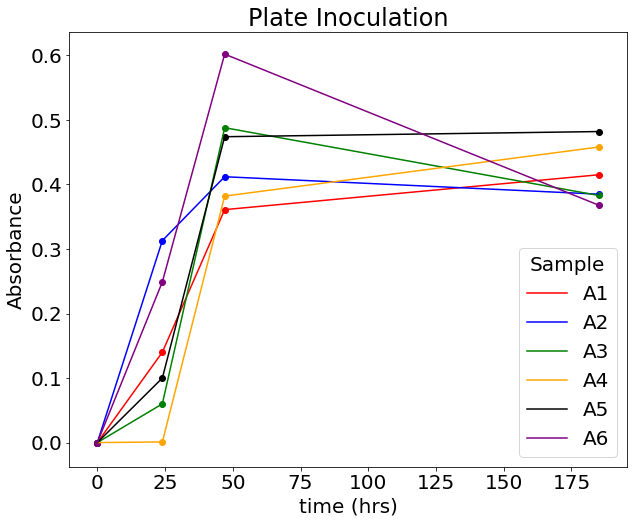

In [319]:
plt.figure(figsize=(10, 8))
plt.title('Plate Inoculation')
plt.xlabel('time (hrs)')
plt.ylabel('Absorbance')
colors = ['red','blue','green','orange','black','purple']
hours = LC_absorbance.columns.values[1:].astype(int)
for idx,row in LC_absorbance.iterrows():
    plt.scatter(hours,row[1:],color = colors[idx])
    plt.plot(hours,row[1:],color = colors[idx],label=row[0])
plt.legend(title='Sample', loc='lower right')
plt.savefig('pictures\\PI_absorbance.png')
plt.show()

## Model For Logistic Growth

In [310]:
LL_values = []
LL_abs = LL_absorbance.drop(columns={'sample'})
times = LL_abs.columns.to_list()
for row in range(len(LL_abs.index)):
    for col in range(len(LL_abs.columns)):
            LL_values.append([int(times[col]),LL_abs.iat[row,col]])
LL_values = np.array(LL_values)
LL_x = LL_values[:,0]
LL_y = LL_values[:,1]


LC_values = []
LC_abs = LC_absorbance.drop(columns={'sample' })
times = LC_abs.columns.to_list()
for row in range(len(LC_abs.index)):
    for col in range(len(LC_abs.columns)):
        LC_values.append([int(times[col]),LC_abs.iat[row,col]])
LC_values = np.array(LC_values)
LC_x = LC_values[:,0]
LC_y = LC_values[:,1]

In [311]:
x = np.concatenate((LL_x,LC_x))
y = np.concatenate((LL_y,LC_y))

In [312]:
def absorbance(t, a0,b0, k):
    """logistic growth"""
    return b0/ (1+ (1/a0 - 1) * np.exp(-k * t))

In [313]:
popt, pcov = curve_fit(absorbance, x, y,bounds=(0,[np.inf,np.inf,np.inf]))
print('[a0,b0,k] = ', popt)
print('stds = ',np.sqrt(np.diag(pcov)))

[a0,b0,k] =  [0.00658303 0.41564238 0.16909688]
stds =  [0.00625813 0.01594952 0.03615766]


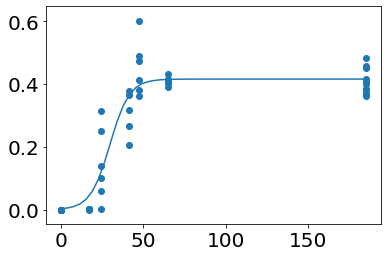

In [307]:
t = np.linspace(0,max(x))
plt.scatter(x,y)
plt.plot(t, absorbance(t, *popt))

Presentation-Ready Graphic

In [320]:
0.0062581*2


0.0125162

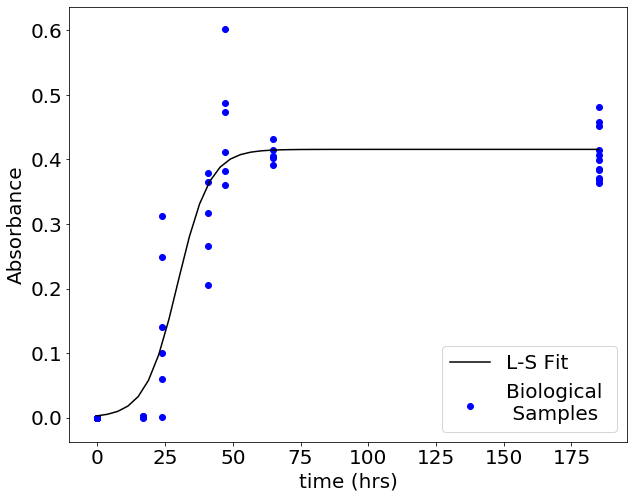

In [316]:
import matplotlib.cm as cm

plt.figure(figsize=(10, 8))
plt.rc('font', size=20)  
plt.xlabel('time (hrs)')
plt.ylabel('Absorbance')
colors1 = cm.get_cmap('tab20')
hours = LL_absorbance.columns.values[1:].astype(int)
for idx,row in LL_absorbance.iterrows():
    plt.scatter(hours,row[1:],color = 'blue')
hours = LC_absorbance.columns.values[1:].astype(int)
for idx,row in LC_absorbance.iterrows():
    if idx == 0:
        plt.scatter(hours,row[1:],color= 'blue',label='Biological \n Samples')
    else:
        plt.scatter(hours,row[1:],color= 'blue')
plt.plot(t, absorbance(t, *popt),'k',label='L-S Fit')
plt.legend( loc='lower right')
plt.savefig('pictures\\AU_time.png')
plt.show()